In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../")
import setigen as stg

In [2]:
all_means = np.load('all_means.npy')

In [3]:
all_stds = np.load('all_stds.npy')

In [4]:
all_mins = np.load('all_mins.npy')

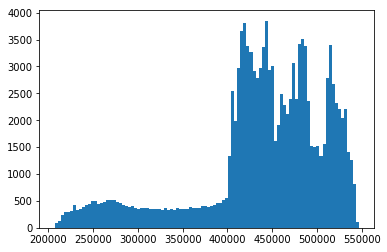

In [5]:
plt.hist(all_means, bins=100)
plt.show()

In [29]:
np.save('all_means.npy', all_means[(all_means > 2e5) & (all_means < 5.5e5)])

In [34]:
all_means.shape

(126419,)

In [47]:
shape = (4,4)
means = all_means[np.random.randint(0, len(all_means), shape)]
stds = all_stds[np.random.randint(0, len(all_stds), shape)]

In [48]:
np.maximum(means, stds)

array([[488862.65625, 520496.78125, 433652.0625 , 443541.59375],
       [488838.96875, 434753.5625 , 501766.9375 , 461858.0625 ],
       [298768.84375, 451550.5625 , 413512.1875 , 426732.78125],
       [282316.625  , 464216.21875, 414998.3125 , 415649.71875]])

In [49]:
stds

array([[243097.96875 , 219604.59375 , 243062.4375  , 276815.65625 ],
       [143576.203125, 255843.234375, 284634.84375 , 226842.375   ],
       [266449.53125 , 223517.390625, 279860.6875  , 251564.140625],
       [245785.21875 , 158871.8125  , 222297.015625, 219281.75    ]])

In [93]:
def choose_from_dist(dist, shape):
    return dist[np.random.randint(0, len(dist), shape)]

def make_normal(means_dist, stds_dist, mins_dist, shape):
    means = choose_from_dist(means_dist, shape)
    stds = choose_from_dist(stds_dist, shape)
    mins = choose_from_dist(mins_dist, shape)
    means = np.maximum(means, stds)
    return means, stds, mins

[485406.9375] [251329.375] [22536.92578125]


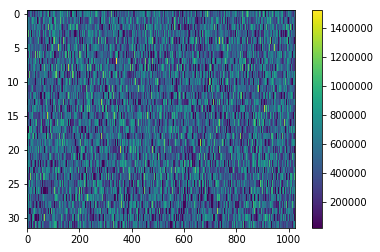

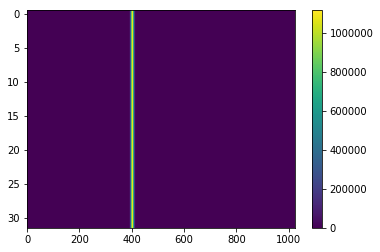

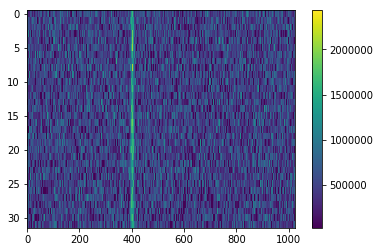

In [136]:
tsamp = 1.4316557653333333
fch1 = 6000.464843051508
df = -1.3969838619232178e-06

fchans = 1024
tchans = 32
fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

means, stds, mins = make_normal(all_means, all_stds, all_mins, 1)
print(means, stds, mins)
frame = np.maximum(np.random.normal(means, stds, [tchans, fchans]), mins)

plt.imshow(frame, aspect='auto')
plt.colorbar()
plt.show()

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans), (fchans-1-start_index)*df/(tsamp*tchans))
line_width = np.random.uniform(0.01, 0.02) ** 3
level = std * 5

drift_rate=0
signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                      stg.constant_t_profile(level = level),
                      stg.gaussian_f_profile(width = line_width),
                      stg.constant_bp_profile(level = 1.0),
                      integrate = False)

plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(signal + frame, aspect='auto')
plt.colorbar()
plt.show()


[356569.] [227369.359375] [9915.37695312]


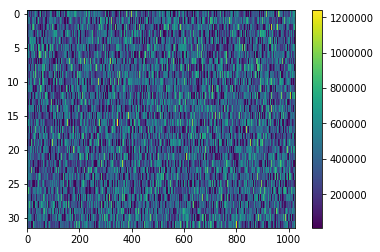

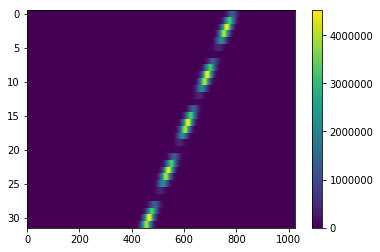

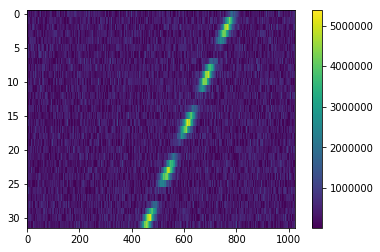

In [115]:
tsamp = 1.4316557653333333
fch1 = 6000.464843051508
df = -1.3969838619232178e-06

fchans = 1024
tchans = 32
fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

frame, mean, std, minimum = stg.gaussian_frame_from_dist(all_means, all_stds, all_mins, [tchans, fchans])
print(mean, std, minimum)

plt.imshow(frame, aspect='auto')
plt.colorbar()
plt.show()

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans), (fchans-1-start_index)*df/(tsamp*tchans))
line_width = np.random.uniform(0.02, 0.04) ** 3
level = std * 10

# drift_rate=0
signal = stg.generate(ts,
                      fs,
                      stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                      stg.sine_t_profile(period=10, amplitude=level, level=level),
                      stg.gaussian_f_profile(width = line_width),
                      stg.constant_bp_profile(level = 1.0),
                      integrate_time=False,
                      average_f_pos=False)

plt.imshow(signal, aspect='auto')
plt.colorbar()
plt.show()
plt.imshow(signal + frame, aspect='auto')
plt.colorbar()
plt.show()


In [99]:
from time import time

A = []
B = []
C = []
D = []

for i in range(100):
    a = time()
    signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = line_width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate_time=True,
                          average_f_pos=True)
    b = time()
    signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = line_width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate_time=True,
                          average_f_pos=False)
    c = time()
    signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = line_width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate_time=False,
                          average_f_pos=True)
    d = time()
    signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = line_width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate_time=False,
                          average_f_pos=False)
    e = time()

    A.append(b-a)
    B.append(c-b)
    C.append(d-c)
    D.append(e-d)
    
print(np.mean(A))
print(np.mean(B))
print(np.mean(C))
print(np.mean(D))

0.0020379543304443358
0.0015078997611999512
0.0018767833709716797
0.0013613176345825195


In [86]:
0.0017479219436645507/0.0012787878513336182

1.3668584213102146

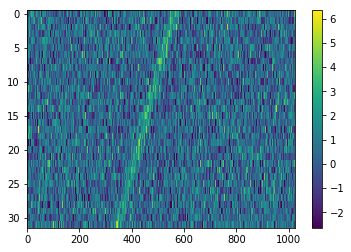

In [30]:
plt.imshow(stg.normalize(signal + frame, cols=128, exclude=0.2), aspect='auto')
plt.colorbar()
plt.show()

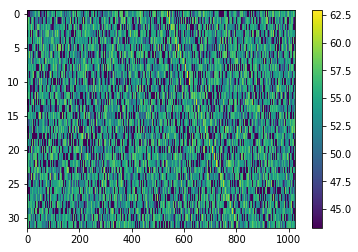

In [15]:
plt.imshow(10*np.log10(signal + frame), aspect='auto')
plt.colorbar()
plt.show()

In [82]:
frame[frame==0].shape

(0,)

In [76]:
import pandas as pd
ds = pd.DataFrame(frame.flatten())
ds.describe()

,0
count,3.276800e+04
mean,4.144278e+05
std,2.709875e+05
min,0.000000e+00
25%,2.066343e+05
50%,4.027953e+05
75%,6.000444e+05
max,1.668333e+06
